In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

sns.set_style('darkgrid')
sns.set_palette('husl')

In [2]:
data = pd.read_csv('cleaned_bank.csv')

In [3]:
data.head(4)

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous
0,59,admin,married,secondary,2343,5,5,1042,1,-1,0
1,56,admin,married,secondary,45,5,5,1467,1,-1,0
2,41,technician,married,secondary,1270,5,5,1389,1,-1,0
3,55,services,married,secondary,2476,5,5,579,1,-1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1510 non-null   int64 
 1   job        1510 non-null   object
 2   marital    1510 non-null   object
 3   education  1510 non-null   object
 4   balance    1510 non-null   int64 
 5   day        1510 non-null   int64 
 6   month      1510 non-null   int64 
 7   duration   1510 non-null   int64 
 8   campaign   1510 non-null   int64 
 9   pdays      1510 non-null   int64 
 10  previous   1510 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 129.9+ KB


In [5]:
data = data.astype({'day':'object'})
# data['Dt_Customer'] = data['Dt_Customer'].apply(pd.to_datetime)

data.drop(columns=['month'], inplace=True)

In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

In [7]:
encoder = LabelEncoder()
cat_cols = ['education', 'marital', 'job']

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

In [8]:
data.head(4)

,age,job,marital,education,balance,day,duration,campaign,pdays,previous
0,59,0,1,1,2343,5,1042,1,-1,0
1,56,0,1,1,45,5,1467,1,-1,0
2,41,9,1,1,1270,5,1389,1,-1,0
3,55,7,1,1,2476,5,579,1,-1,0


In [9]:
data.drop(['pdays','previous'], axis =1, inplace= True)

In [10]:
data = data[data['duration'] != ' ']

In [11]:
data = data[data['duration'] !=''].copy()
data = data.astype({'duration':'int'})

In [12]:
data.reset_index(drop=True, inplace=True)

<Axes: >

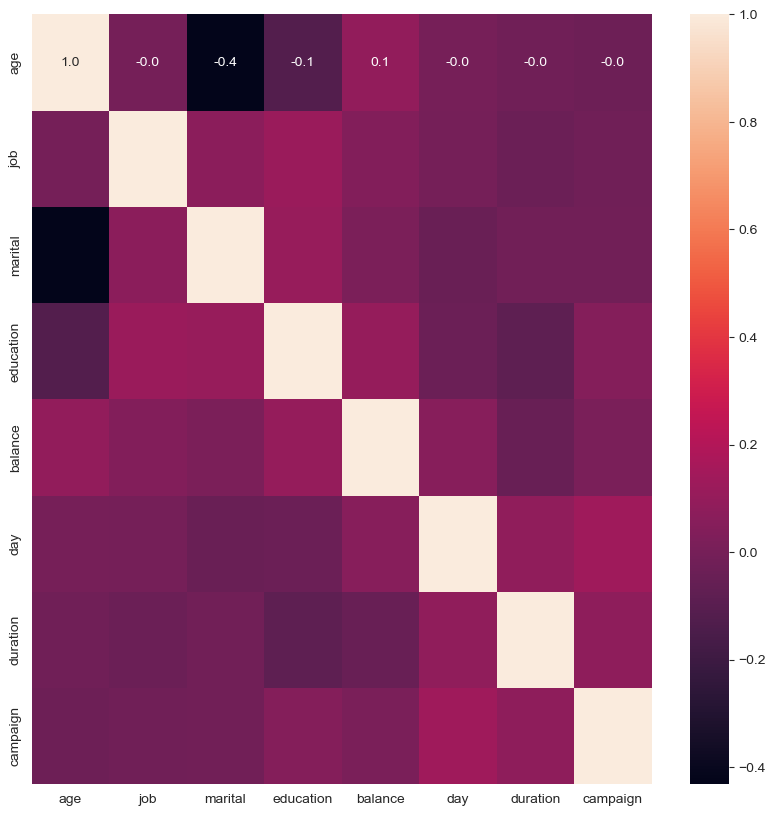

In [13]:
corr = data.corr(method='pearson')

fig = plt.figure(figsize= (10,10))
sns.heatmap(data = corr, fmt= '0.01f', annot=True)

In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data = data_scaled, columns=data.columns)
data_scaled.head(3)

,age,job,marital,education,balance,day,duration,campaign
0,1.690695,-1.387024,-0.260946,-0.382191,0.326138,-1.276175,0.657131,-0.667529
1,1.415968,-1.387024,-0.260946,-0.382191,-0.567387,-1.276175,1.588080,-0.667529
2,0.042331,1.373617,-0.260946,-0.382191,-0.091074,-1.276175,1.417223,-0.667529


In [15]:
pca = PCA(n_components= 3)

data_reduced = pca.fit_transform(data_scaled)

data_reduced = pd.DataFrame(data = data_reduced, columns=['column1', 'column2', 'column3'])

data_reduced.head(3)

,column1,column2,column3
0,1.566066,-0.534847,-0.991305
1,1.446400,0.279188,-1.541903
2,0.067611,-0.390517,-0.626483


Text(0.5, 1.0, 'COLUMN2 VS COLUMN3')

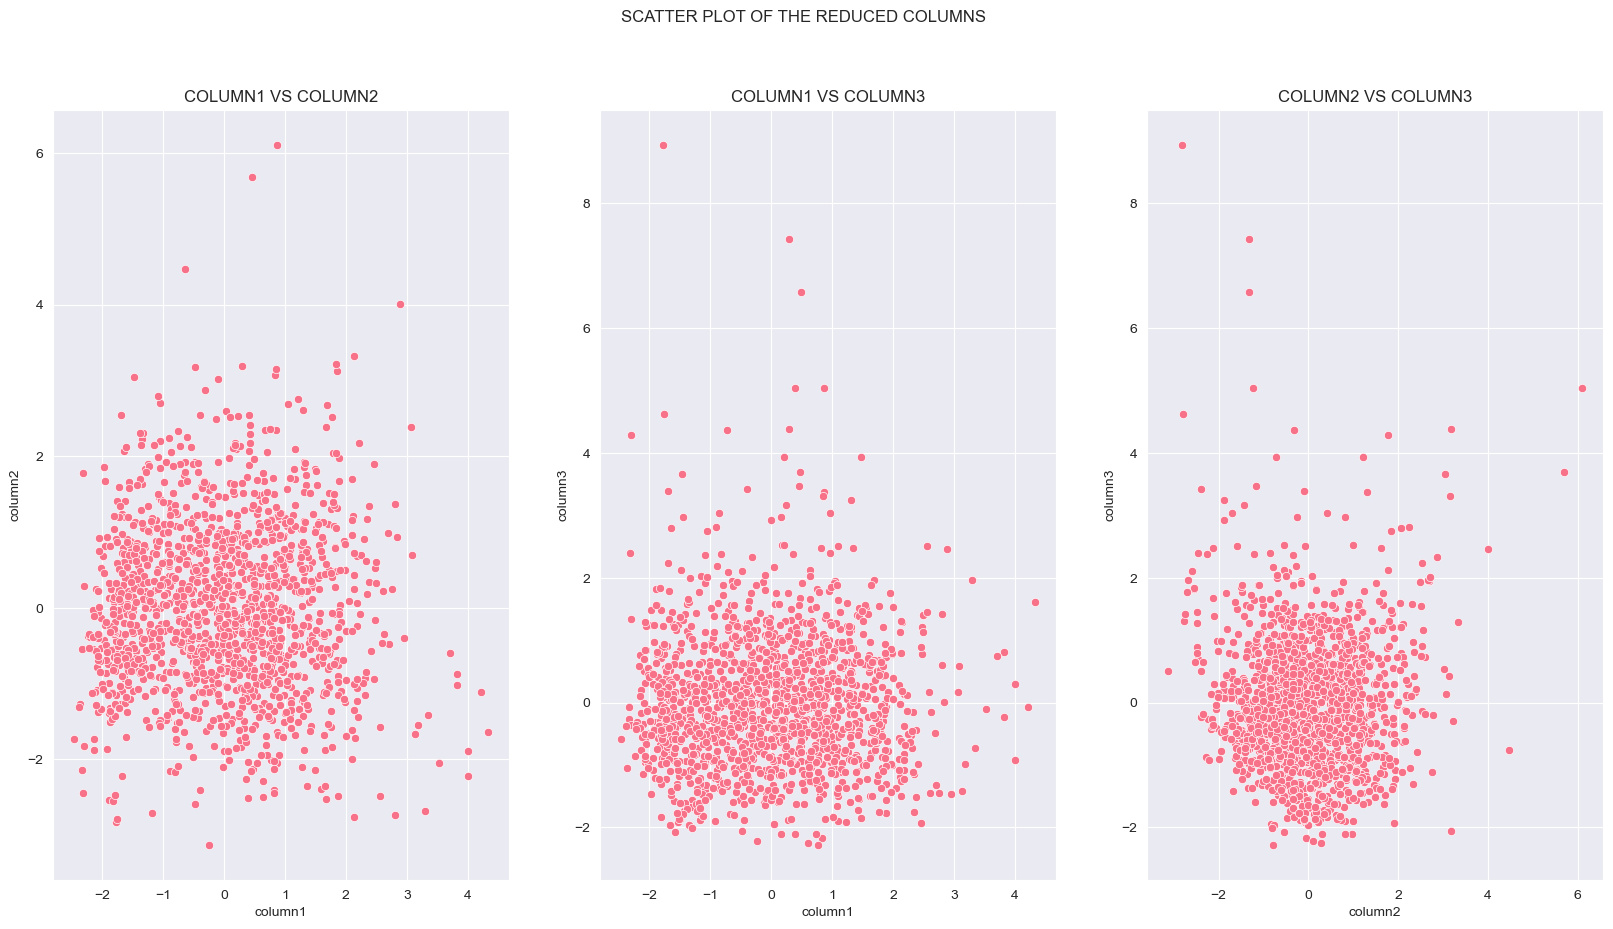

In [16]:
fig, axes = plt.subplots(1,3, figsize = (20,10))
sns.scatterplot(data = data_reduced, x = 'column1', y = 'column2', ax = axes[0])
sns.scatterplot(data = data_reduced, x = 'column1', y = 'column3', ax = axes[1])
sns.scatterplot(data = data_reduced, x = 'column2', y = 'column3', ax = axes[2])

plt.suptitle('SCATTER PLOT OF THE REDUCED COLUMNS')

axes[0].set_title('COLUMN1 VS COLUMN2')
axes[1].set_title('COLUMN1 VS COLUMN3')
axes[2].set_title('COLUMN2 VS COLUMN3')

Text(0.5, 0.92, '3D SCATTER PLOT OF THE THREE COLUMNS')

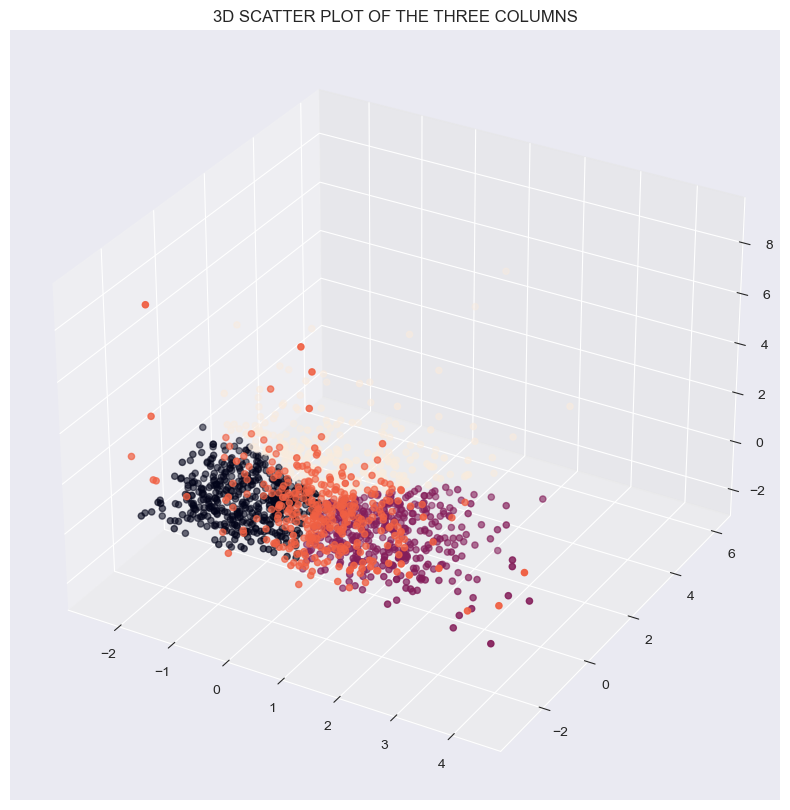

In [24]:
x = data_reduced['column1']
y = data_reduced['column2']
z = data_reduced['column3']

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x,y,z, c = preds, marker = 'o')

ax.set_title('3D SCATTER PLOT OF THE THREE COLUMNS')

In [22]:
px.scatter_3d(
    data_frame = data_reduced, x = 'column1', y = 'column2', z = 'column3',
    color = preds
)

In [21]:
kmeans = KMeans(n_clusters= 4, n_init = 'auto')

preds = kmeans.fit_predict(data_reduced)

preds

array([1, 1, 1, ..., 0, 2, 2])

In [23]:
preds

array([1, 1, 1, ..., 0, 2, 2])

In [19]:
data.head(10)

,age,job,marital,education,balance,day,duration,campaign
0,59,0,1,1,2343,5,1042,1
1,56,0,1,1,45,5,1467,1
2,41,9,1,1,1270,5,1389,1
3,55,7,1,1,2476,5,579,1
4,54,0,1,2,184,5,673,2
5,42,4,2,2,0,5,562,2
6,56,4,1,2,830,6,1201,1
7,60,5,0,1,545,6,1030,1
8,37,9,1,1,1,6,608,1
9,28,7,2,1,5090,6,1297,3


In [25]:
data['clusters'] = ['cluster_1' if x == 0 else 'cluster2' if x == 1
                    else 'cluster3' if x == 2 else 'cluster4' for x in preds]

In [26]:
data.head(4)

,age,job,marital,education,balance,day,duration,campaign,clusters
0,59,0,1,1,2343,5,1042,1,cluster2
1,56,0,1,1,45,5,1467,1,cluster2
2,41,9,1,1,1270,5,1389,1,cluster2
3,55,7,1,1,2476,5,579,1,cluster3


<Axes: xlabel='clusters', ylabel='balance'>

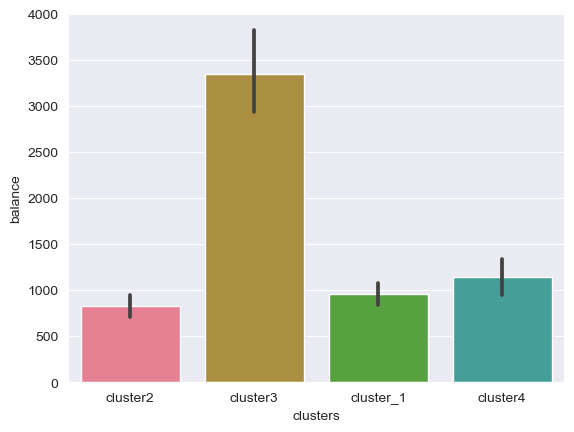

In [27]:
data['debt'] = data['balance'] + data['duration']

fig, axes
sns.barplot(data=data, x = 'clusters', y = 'balance')

<Axes: xlabel='clusters', ylabel='marital'>

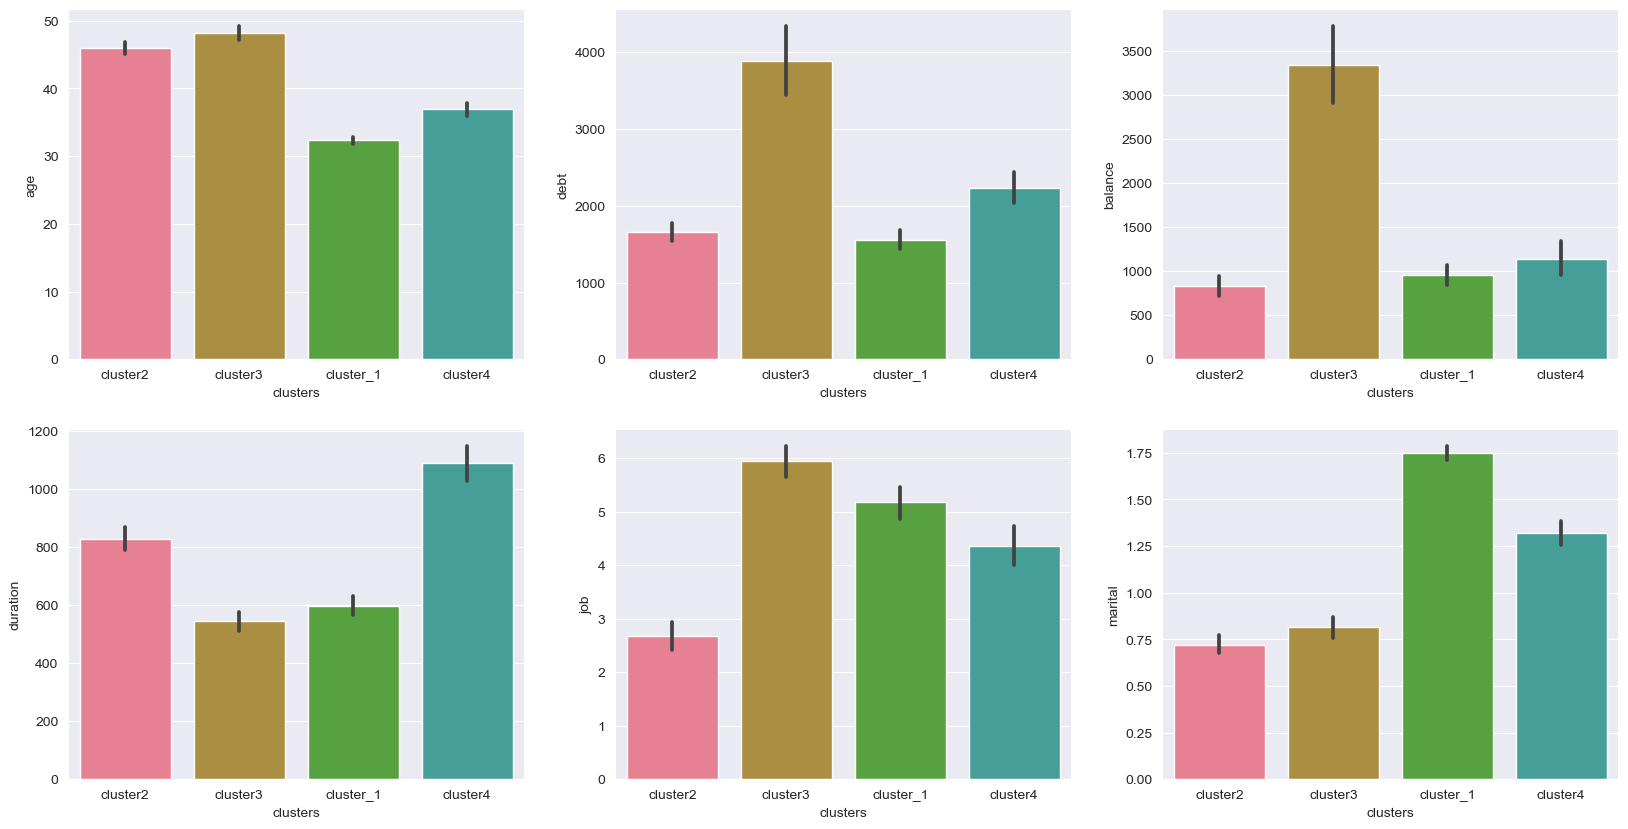

In [28]:
fig, axes = plt.subplots(2,3, figsize = (20,10))
sns.barplot(data = data, x = 'clusters', y = 'age', ax = axes[0,0])
sns.barplot(data = data, x = 'clusters', y = 'debt', ax = axes[0,1])
sns.barplot(data = data, x = 'clusters', y = 'balance', ax = axes[0,2])
sns.barplot(data = data, x = 'clusters', y = 'duration', ax = axes[1,0])
sns.barplot(data = data, x = 'clusters', y = 'job', ax = axes[1,1])
sns.barplot(data = data, x = 'clusters', y = 'marital', ax = axes[1,2])